# Statistical Properties of simulated financial data

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels as smd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
"""numpy and pandas have faster release cycles and statsmodels often lags in catching up with deprecations and deprecation warnings. However, they are usually fixed after a short delay. Deprecation warnings in statsmodels can be ignored by users. (reporting deprecation warnings in statsmodels master is still useful in case we are slow in seeing them)"""

'numpy and pandas have faster release cycles and statsmodels often lags in catching up with deprecations and deprecation warnings. However, they are usually fixed after a short delay. Deprecation warnings in statsmodels can be ignored by users. (reporting deprecation warnings in statsmodels master is still useful in case we are slow in seeing them)'

In [3]:
''' = 10
 = 5

paths = np.zeros((M + 1, I), np.float64)   # Each column is a path
paths'''

' = 10\n = 5\n\npaths = np.zeros((M + 1, I), np.float64)   # Each column is a path\npaths'

In [4]:
K = 10

rand = np.random.standard_normal(K)    # Get a std normal draw for each path
#rand = (rand - rand.mean()) / rand.std()   # Make sure the random number set for each point has mean 0, std 1 
print(rand)

[-0.8044583   0.32093155 -0.02548288  0.64432383 -0.30079667  0.38947455
 -0.1074373  -0.47998308  0.5950355  -0.46466753]


In [5]:
H = 10

rand = np.random.standard_normal(H)
print(rand)
rand = (rand - rand.mean()) / rand.std()   # Make sure the random number set for each point has mean 0, std 1 
print(rand.mean())
print(rand.std())

[ 0.66728131 -0.80611561 -1.19606983 -0.40596016 -0.18237734  0.10319289
 -0.13842199  0.70569237  1.27179528 -0.98674733]
-2.22044604925e-17
1.0


In [6]:
def gen_paths(S0=100, r=0.05, sigma=0.25, T=1, N=200, J=10000):
    ''' Generates Monte Carlo simulation paths ( geometric brownian motion) for stock movement
    Parameters
    ==========
    S0 : float (initial stock price)
    r : float (constant interest rate)
    sigma : float (constant volatility)
    T : float (time to the simulated path)
    N : int (N+1 nodes on each path)
    J : int (number of simulated paths)
    Returns
    =======
    paths : ndarray, shape (N + 1, I)    (dimensions of simulated paths)
    '''
    dt = float(T) / N
    paths = np.zeros((N + 1, J), np.float64)   # Each column is a simulated path
    paths[0,:] = 100                            # Assign the first element of each column is 100
    for t in range(1, N + 1):                  # N nodes in range, making N+1 nodes in all with the initial value
        rand = np.random.standard_normal(J)    # Get a std normal draw for each path
        rand = (rand - rand.mean()) / rand.std()   # Make sure the random number set for each point has mean 0, std 1 
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [7]:
n=500
paths = gen_paths(N=n)
print(paths.shape)

(501, 10000)


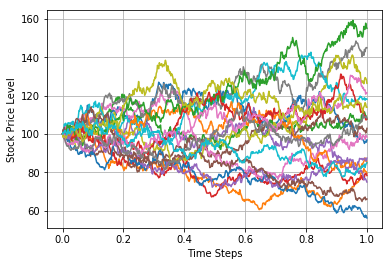

In [8]:
t=np.linspace(0,1,501)
plt.plot(t,paths[:, :20])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

In [9]:
# calculate the return
log_returns=np.log(paths[1:]/paths[0:-1])
type(log_returns)


numpy.ndarray

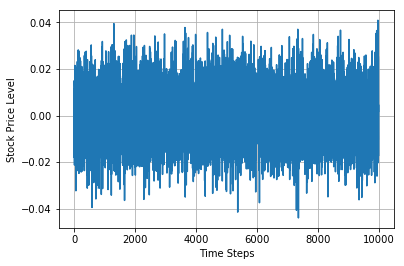

In [10]:
plt.plot(log_returns[1])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

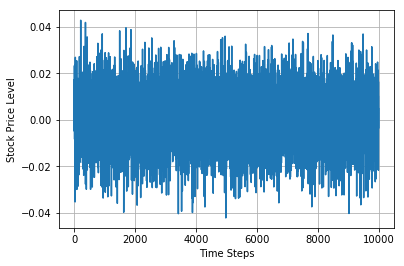

In [11]:
plt.plot(log_returns[2])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Level')

In [12]:
paths[:20, 0].round(4)

array([ 100.    ,   99.6465,   99.0456,   99.3407,   97.8651,   98.5094,
         98.1584,   97.6462,   96.2626,   96.3998,   95.9651,   96.6128,
         98.3388,   98.2003,   97.9902,   99.3417,  100.8053,  101.2469,
        101.4789,  100.3325])

In [13]:
paths[:20, 1].round(4)

array([ 100.    ,   99.9066,   98.1254,   97.7007,   96.8927,   98.5744,
         99.0207,   98.4359,   98.6408,   97.4094,   97.0882,   95.9664,
         96.8089,   98.0159,   99.8134,   99.407 ,  100.5066,  102.3232,
        102.2252,  102.8972])

In [14]:
log_returns[:20, 0].round(4)

array([-0.0035, -0.006 ,  0.003 , -0.015 ,  0.0066, -0.0036, -0.0052,
       -0.0143,  0.0014, -0.0045,  0.0067,  0.0177, -0.0014, -0.0021,
        0.0137,  0.0146,  0.0044,  0.0023, -0.0114,  0.0046])

In [15]:
log_returns[:20, 1].round(4)

array([-0.0009, -0.018 , -0.0043, -0.0083,  0.0172,  0.0045, -0.0059,
        0.0021, -0.0126, -0.0033, -0.0116,  0.0087,  0.0124,  0.0182,
       -0.0041,  0.011 ,  0.0179, -0.001 ,  0.0066,  0.0119])

In [16]:
def print_statistics(array):  
    ''' statistics results.
    
    
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('Statistic', 'Result'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [17]:
print_statistics(log_returns.flatten()) #scs

     Statistic          Result
------------------------------
          size   5000000.00000
           min        -0.05870
           max         0.06042
          mean         0.00004
           std         0.01118
          skew         0.00024
      kurtosis         0.00204


0.0089442719099991595

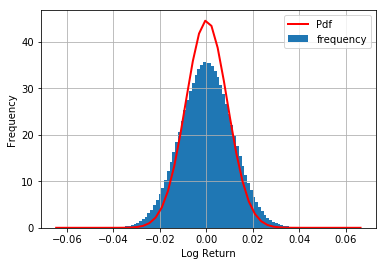

In [18]:
plt.hist(log_returns.flatten(), bins=100, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
r=0.05
sigma=0.2        
N=n
plt.plot(x, scs.norm.pdf(x, loc=r / N, scale=sigma / np.sqrt(N)),color='r', lw=2.0, label='Pdf')
# loc is the mean, scale is the std
plt.legend()
sigma/np.sqrt(N)

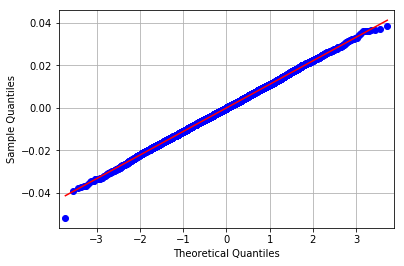

In [19]:
sm.qqplot(log_returns.flatten()[::500], line='s') #sm
plt.grid(True)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

In [20]:
def normality_tests(narray):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(narray))
    print ("Skew test p-value %14.3f" % scs.skewtest(narray)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(narray))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(narray)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(narray)[1])

In [21]:
normality_tests(log_returns.flatten())

Skew of data set          0.000
Skew test p-value          0.828
Kurt of data set          0.002
Kurt test p-value          0.352
Norm test p-value          0.633


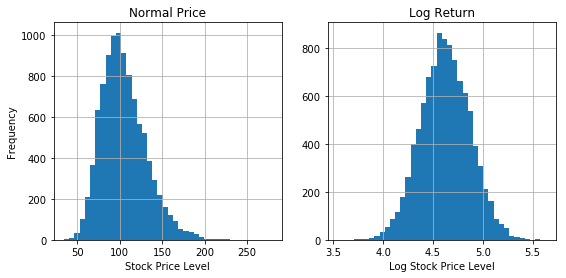

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))       # subplots 1 row and 2 columns, figsize in cm
ax1.hist(paths[-1], bins=40)
ax1.grid(True)
ax1.set_xlabel('Stock Price Level')
ax1.set_ylabel('Frequency')
ax1.set_title('Normal Price')
ax2.hist(np.log(paths[-1]), bins=40)
ax2.grid(True)
ax2.set_xlabel('Log Stock Price Level')
ax2.set_title('Log Return')

In [23]:
print_statistics(paths[0])

     Statistic          Result
------------------------------
          size     10000.00000
           min       100.00000
           max       100.00000
          mean       100.00000
           std         0.00000
          skew         0.00000
      kurtosis        -3.00000


In [24]:
print_statistics(paths[1])

     Statistic          Result
------------------------------
          size     10000.00000
           min        95.87828
           max       103.88760
          mean       100.01000
           std         1.11803
          skew        -0.00082
      kurtosis        -0.09130


In [25]:
print_statistics(np.log(paths[1]))

     Statistic          Result
------------------------------
          size     10000.00000
           min         4.56308
           max         4.64331
          mean         4.60521
           std         0.01118
          skew        -0.03283
      kurtosis        -0.09069


In [26]:
normality_tests(np.log(paths[1]))

Skew of data set         -0.033
Skew test p-value          0.180
Kurt of data set         -0.091
Kurt test p-value          0.057
Norm test p-value          0.066


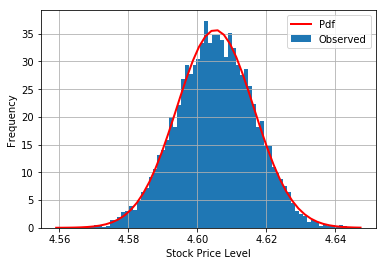

In [27]:
log_data = np.log(paths[1])
plt.hist(log_data, bins=70, normed=True, label='Observed')
plt.grid(True)
plt.xlabel('Stock Price Level')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
'r', lw=2.0, label='Pdf')
plt.legend()

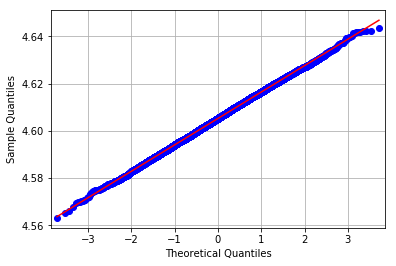

In [28]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

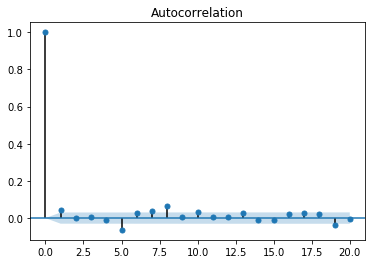

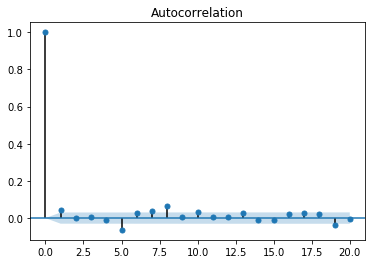

In [29]:
smd.graphics.tsaplots.plot_acf(log_returns[:,0], lags=20, alpha=0.5) #smd

In [30]:
log_returns[:,0].size

500

In [31]:
print(log_returns[:,0])

[ -3.54088468e-03  -6.04884338e-03   2.97515777e-03  -1.49652794e-02
   6.56212248e-03  -3.57046159e-03  -5.23125517e-03  -1.42709458e-02
   1.42423574e-03  -4.51916473e-03   6.72650906e-03   1.77073733e-02
  -1.40968009e-03  -2.14138419e-03   1.36974981e-02   1.46254471e-02
   4.37105235e-03   2.28920453e-03  -1.13611505e-02   4.59269273e-03
  -3.16873420e-05   2.54563095e-02   8.31524756e-03   1.72137907e-02
  -1.76824128e-02  -1.94210622e-02  -1.52018656e-02   7.35015051e-03
   1.28522874e-02   1.55300953e-03   2.12452489e-02   1.04540018e-02
  -1.27201956e-03  -1.41840646e-03  -1.22792472e-03   1.79594376e-02
   6.37829504e-03   5.58125144e-03   2.74206125e-02   5.20756013e-03
   2.12352898e-02  -2.43238833e-02   2.41888727e-03  -1.30264539e-02
   9.21518386e-03   5.06687762e-03   3.18315570e-03  -1.19456224e-02
  -3.10164556e-03   1.10866571e-03  -1.33758144e-02  -6.17886872e-03
  -5.72053295e-03   7.18291090e-04   7.00089853e-03  -9.77140841e-03
  -6.34937530e-03  -6.28032748e-04

In [32]:
print(log_returns[:,1])

[ -9.33936525e-04  -1.79897413e-02  -4.33753186e-03  -8.30528123e-03
   1.72080853e-02   4.51754578e-03  -5.92346921e-03   2.07878067e-03
  -1.25614578e-02  -3.30373481e-03  -1.16217678e-02   8.74084679e-03
   1.23915017e-02   1.81724928e-02  -4.07965685e-03   1.10007469e-02
   1.79124556e-02  -9.57872176e-04   6.55241613e-03   1.19349458e-02
  -5.62986440e-03  -2.94350231e-03   7.28543569e-03  -2.19882269e-02
   1.01606635e-02  -1.38723581e-02   6.04224393e-03   1.86366370e-03
  -2.29156425e-03  -5.43212430e-03   7.61619902e-03  -5.57998481e-03
  -3.03531566e-03   5.04751211e-03  -2.77395925e-04  -8.58036955e-03
   1.65467863e-02  -1.47174859e-02   5.35568433e-03  -8.91281741e-03
  -1.76943243e-02   8.89371263e-03  -1.07215713e-02  -8.17528776e-03
  -2.87001356e-03   2.80527689e-03  -8.48732821e-03  -7.93140578e-03
   1.28873666e-02  -2.04647962e-02   8.52278017e-03   5.21409296e-03
  -5.49154540e-03  -2.27536220e-02  -1.02293115e-02  -1.83217121e-02
   8.22596857e-03   1.40885873e-02